# Aim
Perform Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# list available styles
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
plt.style.use('fivethirtyeight')

In [3]:
# read the data
calendar_df = pd.read_csv('../data/raw/calendar.csv')
sell_prices_df = pd.read_csv('../data/raw/sell_prices.csv')
sales_train_val_df = pd.read_csv('../data/raw/sales_train_validation.csv')
submission_df = pd.read_csv('../data/raw/sample_submission.csv')

## 1. calendar_df

In [5]:
# take a random look at the calendar df 
calendar_df.sample(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
856,2013-06-03,11319,Monday,3,6,2013,d_857,NaN,NaN,NaN,NaN,1,1,1
968,2013-09-23,11335,Monday,3,9,2013,d_969,NaN,NaN,NaN,NaN,0,0,0
1478,2015-02-15,11503,Sunday,2,2,2015,d_1479,NaN,NaN,NaN,NaN,0,1,1
535,2012-07-17,11225,Tuesday,4,7,2012,d_536,NaN,NaN,NaN,NaN,0,0,0
393,2012-02-26,11205,Sunday,2,2,2012,d_394,NaN,NaN,NaN,NaN,0,0,0
307,2011-12-02,11144,Friday,7,12,2011,d_308,NaN,NaN,NaN,NaN,1,0,1
1274,2014-07-26,11426,Saturday,1,7,2014,d_1275,NaN,NaN,NaN,NaN,0,0,0
1217,2014-05-30,11417,Friday,7,5,2014,d_1218,NaN,NaN,NaN,NaN,0,0,0
319,2011-12-14,11146,Wednesday,5,12,2011,d_320,NaN,NaN,NaN,NaN,0,0,1
582,2012-09-02,11232,Sunday,2,9,2012,d_583,NaN,NaN,NaN,NaN,1,0,1


**Observations**
1. There are missing values present in the columns: `'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'`
2. The columns: `snap_CA, snap_TX, snap_WI` take valeus `0` and `1`.

In [6]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


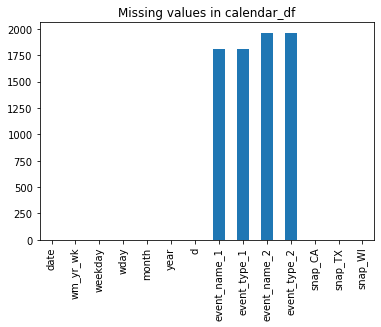

In [16]:
calendar_df.isna().sum().plot(kind= 'bar', title = 'Missing values in calendar_df');

**Observation**
1. The number of **rows** and **columns** is **1969** and **14** respetively.
2. The number of missing values in the columns `event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'` is quite high.

**To do:**
1. Fix missing values.
2. Change datatype of the `date` column

In [25]:
# descriptive statistics of object datatype columns
calendar_df.describe(include = [np.object])

,date,weekday,d,event_name_1,event_type_1,event_name_2,event_type_2
count,1969,1969,1969,162,162,5,5
unique,1969,7,1969,30,4,4,2
top,2015-02-22,Saturday,d_1342,Ramadan starts,Religious,Father's day,Cultural
freq,1,282,1,6,55,2,4


**Observation**
1. The dates are not repeated.
2. The weeks are mostly uniformly distributed.

In [26]:
# descriptive statistics of numeric columns
calendar_df.describe(include = [np.number])

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


**Observation**
1. The `year` column takes values of 4 years from 2013, 2014, 2015, 2016.
2. The `month` column takes values of 12 months of the calendar.

In [ ]:
# reference: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
def bar_chart_values(df, col, title, xlabel):
    
    ax = df[col].value_counts().plot(kind='bar', figsize=(10,7),
                                                 color="dodgerblue", fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=15);
        
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.1, i.get_y()+.31, \
                str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
        
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
        

In [ ]:
bar_chart_values(calendar_df, 'weekday', "Weekdays count", "weekday")

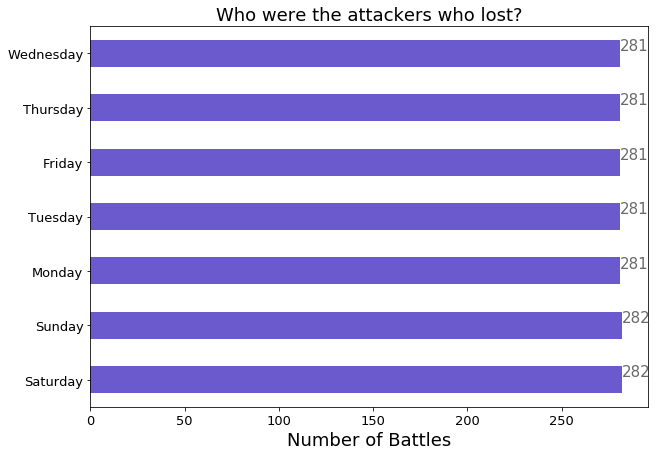

In [37]:
ax = calendar_df['weekday'].value_counts().plot(kind='barh', figsize=(10,7),
                                                 color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Who were the attackers who lost?", fontsize=18)
ax.set_xlabel("Number of Battles", fontsize=18);
#ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

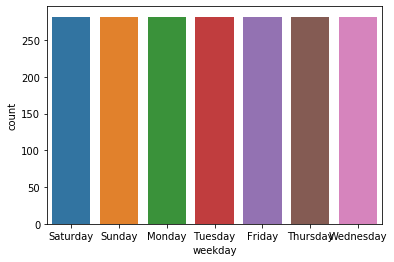

In [35]:
import seaborn
seaborn.countplot(data=calendar_df, x='weekday', order=calendar_df['weekday'].value_counts().index)

In [31]:
for i in range(top):
    fs.annotate(dist[i],xy=(i,dist[i]+0.2),xycoords='data',ha='center')

ValueError: Image size of 676026x428015 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

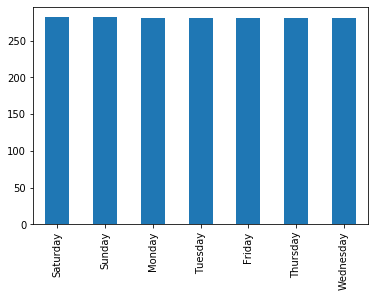

In [34]:
calendar_df['weekday'].value_counts().plot(kind = 'bar')

In [5]:
sell_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [4]:
#plt.figure(figsize = (10, 6))
#calendar_df['event_name_1'].value_counts().plot.barh()

In [6]:
sell_prices_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [7]:
sales_train_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [8]:
sales_train_validation_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [9]:
sales_train_validation_df['id'].value_counts()

HOUSEHOLD_1_429_TX_2_validation    1
HOUSEHOLD_1_483_WI_1_validation    1
HOBBIES_1_246_CA_2_validation      1
HOUSEHOLD_2_018_CA_3_validation    1
HOUSEHOLD_2_098_TX_3_validation    1
                                  ..
FOODS_3_742_WI_2_validation        1
HOUSEHOLD_2_255_WI_3_validation    1
FOODS_2_150_CA_1_validation        1
HOBBIES_2_081_CA_4_validation      1
HOUSEHOLD_1_072_CA_3_validation    1
Name: id, Length: 30490, dtype: int64

### To do:
1. Reduce memory consumption
2. Plot charts for EDA

In [10]:
# shape of df
print('shape of calendar_df', calendar_df.shape)
print('shape of sells_df', sell_prices_df.shape)
print('shape of sales_train_validation_df', sales_train_validation_df.shape)
print('shape of submission_df', submission_df.shape)

shape of calendar_df (1969, 14)
shape of sells_df (6841121, 4)
shape of sales_train_validation_df (30490, 1919)
shape of submission_df (60980, 29)


In [11]:
str(sales_train_validation_df.memory_usage().sum() / 1024 ** 2) + ' MB'

'446.3983612060547 MB'

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
def encode_categorical(df, cols, fillna=False):
    """Label encoding across multiple columns"""
    for col in cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].fillna("MISSING") if fillna else df[col])
    return df

In [14]:
calendar_df = encode_categorical(df = calendar_df, cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], fillna = True)

In [15]:
sales_train_validation_df = encode_categorical(df = sales_train_validation_df, cols = ["item_id", "dept_id", "cat_id", "store_id", "state_id"])

In [16]:
sell_prices_df = encode_categorical(df = sell_prices_df, cols = ["item_id", "store_id"])

In [31]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt
def melt(sales_train_validation_df, submission_df, nrows = 55_000_000):
    # melt sales data, get it ready for training
    id_cols = ['id','item_id','dept_id', 'cat_id','store_id','state_id']
    sales_train_validation_df  = pd.melt(sales_train_validation_df, 
                                         id_vars=id_cols,
                                         var_name = "day", 
                                         value_name="demand")
    
    # separate test dataframes.
    test1 = submission_df[submission_df["id"].str.endswith("validation")]
    test2 = submission_df[submission_df["id"].str.endswith("evaluation")]
    
    # change column names
    test1.columns = ["id"] + [f"d_{x}".format(x) for x in range(1914, 1914 + 28)]
    test2.columns = ["id"] + [f"d_{x}".format(x) for x in range(1942, 1942 + 28)]
    
    # get product table
    product = sales_train_validation_df[id_cols].drop_duplicates()
    
    # merge test and product table
    test2["id"] = test2["id"].str.replace("_evaluation", "_validation")
    test1 = test1.merge(product, how="left", on="id")
    test2 = test2.merge(product, how="left", on="id")
    test2["id"] = test2["id"].str.replace("_validation", "_evaluation")
    
    test1 = pd.melt(test1, id_vars=id_cols, var_name="day", value_name="demand")
    test2 = pd.melt(test2, id_vars=id_cols, var_name="day", value_name="demand")
    
    sales_train_validation_df["part"] = "train"
    test1["part"] = "test1"
    test2["part"] = "test2"
    
    data = pd.concat([sales_train_validation_df, test1, test2], axis=0)
        
    del sales_train_validation_df, test1, test2
    
    # get only a sample for fast training.
    data = data.loc[nrows:]

    # delete test2 for now.
    data = data[data["part"] != "test2"]
    
    return data


In [28]:
def merge_calendar(data, calendar):
    # drop some calendar features.
    calendar = calendar.drop(["weekday", "wday", "month", "year"], axis=1)

    # notebook crashes with the entire dataset.
    data = pd.merge(data, calendar, how="left", left_on=["day"], right_on=["d"])
    return data.drop(["d", "day"], axis=1)

In [29]:
def merge_sell_prices(data, sell_prices):
    # get the sell price data (this feature should be very important).
    return data.merge(sell_prices, on=["store_id", "item_id", "wm_yr_wk"], how="left")

In [32]:
data = melt(sales_train_validation_df, submission_df, nrows=27_500_000)

del sales_train_validation_df
gc.collect()

C:\Users\saurabh\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


78

In [33]:
data = merge_calendar(data, calendar_df)

del calendar_df
gc.collect()

2706

In [34]:
data = merge_sell_prices(data, sell_prices_df)
del sell_prices_df
gc.collect()

22

In [1]:
import mlflow

ModuleNotFoundError: No module named 'mlflow'

https://www.kaggle.com/tpmeli/visual-guide-3-m5-baselines-eda-sarima

In [7]:
%b
[{'aprices': [{'date': None, 'value': 'Цена', 'kind': 28621, 'currency': 'RUR'}], 'cat_node': {}, 'title': 'PartNumber', 'description': None, 'brand': 'Бренд', 'supplier_code': 'код', 'egais_code': None, 'country': None, 'manufacturer': None, 'prices': [], 'barcode': '', 'mk_uuid': None, 'ls_uuid': None, 'ls_pk': None, 'volume': None, 'weight': None, 'width': None, 'height': None, 'depth': None, 'mu_code': None, 'minord': None, 'multiplicity': None, 'count': None, 'sellby': None, 'price_doc_item_id': None, 'categories': []}, {'aprices': [], 'cat_node': {}, 'title': 'повторение мать учения', 'description': None, 'brand': 'гучии', 'supplier_code': None, 'egais_code': None, 'country': None, 'manufacturer': None, 'prices': [{'date': None, 'value': 1, 'kind': 28621, 'currency': 'RUR'}], 'barcode': '', 'mk_uuid': None, 'ls_uuid': None, 'ls_pk': None, 'volume': None, 'weight': None, 'width': None, 'height': None, 'depth': None, 'mu_code': None, 'minord': None, 'multiplicity': None, 'count': None, 'sellby': None, 'price_doc_item_id': None, 'categories': []}]


UsageError: Line magic function `%black` not found.


In [1]:
import black

In [5]:
%pip install black

  Using cached typed_ast-1.4.1-cp37-cp37m-win_amd64.whl (155 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
%load_ext black

The black module is not an IPython extension.
